### Plotting Pupil and PSF


In [1]:
import sys
sys.path.append("../../Other_AO_sims/") 
import proper
import matplotlib.pyplot as plt
#from vip_hci.var import fit_2dgaussian
import numpy as np
%matplotlib inline
proper.print_it = False

def make_psf(conf):
    focal_length = conf['diam'] * conf['focal_ratio']
    # Define the wavefront
    wfo = proper.prop_begin(conf['diam'], conf['wavelength'], conf['gridsize'], conf['beam_ratio'])
    
    # Define a circular aperture
    proper.prop_circular_aperture(wfo, conf['diam']/2)
    if conf['sec_obs'] == 0:
        None
    else:
        proper.prop_circular_obscuration(wfo, conf['sec_obs']*conf['diam']/2)
    # Define entrance
    proper.prop_define_entrance(wfo)
    pupil = proper.prop_get_amplitude(wfo)
    # Define a lens
    proper.prop_lens(wfo, focal_length)
    # Propagate the wavefront
    proper.prop_propagate(wfo, focal_length)
    # End
    (wfo, sampling) = proper.prop_end(wfo)
    return wfo, pupil


In [2]:
# Define entrance aperture diameter and other quantities

conf=dict(
diam = 0.2794,
focal_ratio = 15.0,
wavelength = 550e-9,
gridsize = 512,
#pixelsize = 45.25, # mas/pix
pixelsize = 80, # mas/pix
gamma = 10, 
sec_obs = 0)

scale = 1 # to scale tescope res 1/1.22

# pixelsize*4.85e-9/(wavelength/diam)
# npupil/ngrid*(diam_ext/pupil_img_size)

conf['beam_ratio'] = conf['pixelsize']*4.85e-9/(scale*conf['wavelength']/conf['diam'])
#beam_ratio = 1/gamma,

tel_res = scale*conf['wavelength']/conf['diam']*206265*1e3

print('Telescope resolution:', tel_res)
psf, pupil = make_psf(conf)

print('Flux at pupil and focal plane:', np.sum(pupil**2), np.sum(psf))


Telescope resolution: 406.0334645669291
Flux at pupil and focal plane: 0.9999999999999999 1.0


Flux at pupil and focal plane: 1.0 1.0000000000000002


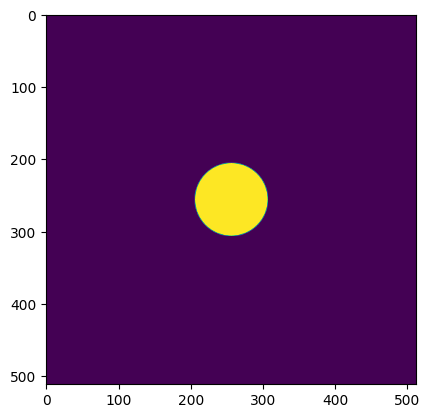

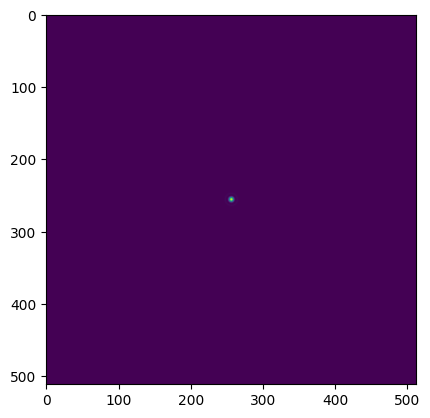

In [7]:
%matplotlib inline
conf['sec_obs'] = 0.3
psf1, pupil1 = make_psf(conf)

print('Flux at pupil and focal plane:', np.sum(pupil1**2), np.sum(psf1))
plt.figure()
plt.imshow(pupil)
plt.figure()
plt.imshow(psf)